In [32]:
import torch
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision.datasets import Omniglot
from torchvision.transforms import transforms
from torchvision import models
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

In [33]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

ds = Omniglot(root=".", download=True, transform=transform)

Files already downloaded and verified


(-0.5, 223.5, 223.5, -0.5)

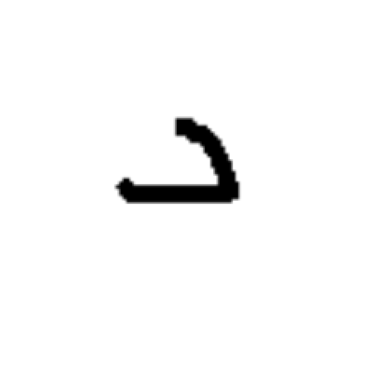

In [34]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img, lbl = ds[0]
plt.imshow(img[0], cmap='gray')
plt.axis('off')

In [35]:
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Identity()

features = []
labels = []
dl = DataLoader(dataset=ds, batch_size=32, shuffle=False)

model.eval()
with torch.no_grad():
    for images, targets in dl:
        output = model(images)
        features.extend(output.numpy())
        labels.extend(targets.numpy())

features = np.array(features)
labels = np.array(labels)

trn_features = features[: 15 * len(ds._characters)]
trn_labels = labels[: 15 * len(ds._characters)]
val_features = features[15 * len(ds._characters) :]
val_labels = labels[15 * len(ds._characters) :]

train_features_reshaped = trn_features.reshape(
    trn_features.shape[0], 1, trn_features.shape[1]
)
test_features_reshaped = val_features.reshape(
    val_features.shape[0], 1, val_features.shape[1]
)

clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(trn_features, trn_labels)
prediction = clf.predict(val_features)

/home/nekozo/newSpace/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/nekozo/newSpace/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
acc = accuracy_score(val_labels, prediction)
print(f"Accuracy: {acc}")

Accuracy: 0.0
